# Could sticking to the Paris Agreement limit of 1.5$^{\circ}$C avoid mass mortality on the Great Barrier Reef?


#### notes: 
    
the mini-pracs should take no more than 25 minutes, ideally with a mixture of into lecture (~10 mins) and then the remainder of the time for students to do something interactive. The goal here is to highlight some really cool Exeter research you're doing, ideally with some links to potential dissertation research projects and/or 3rd year modules -- at the end of the practical students would ideally be excited about opportunities to learn/research at Exeter.

## Introduction

Coral reefs are very sensitive to high temperatures. We are doing work aimed to provide the Great Barrier Reef Marine Park Authority with guidance on where and when reefs migh experience this stress in the future.


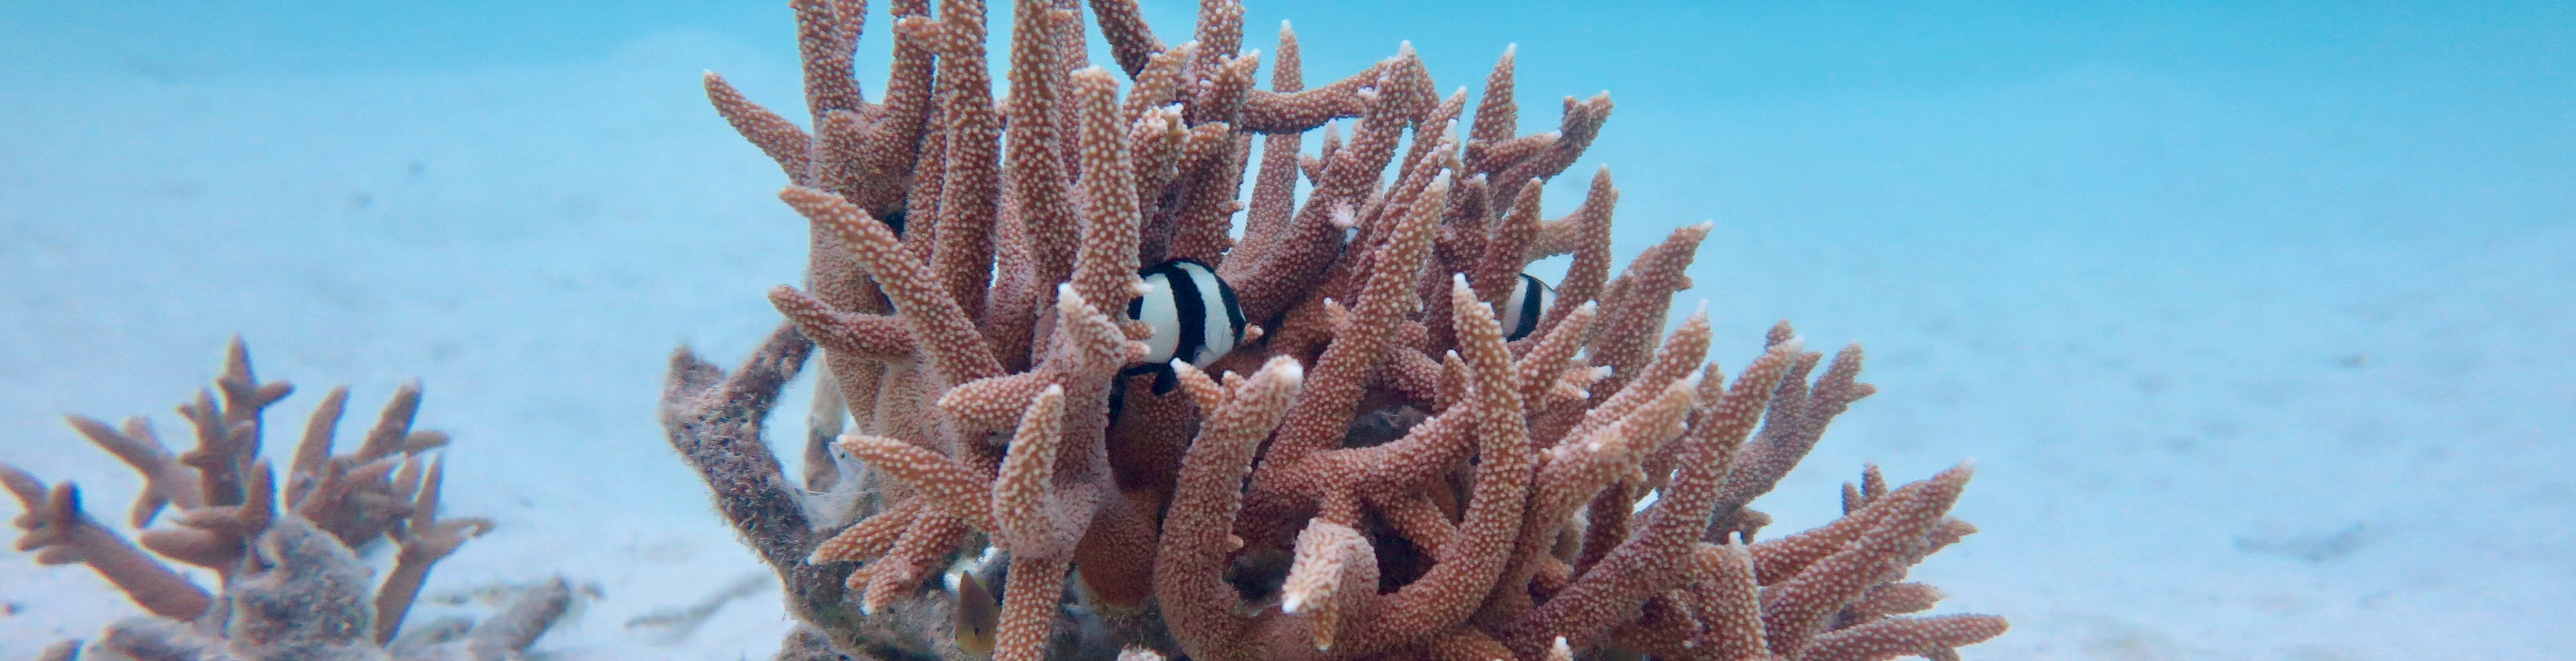

In [314]:
from IPython.display import Image
Image(filename='images/IMG_4919.jpeg') 

In [ ]:
Add a plot showing the 5858 and 119 emissions scenarios

## Setup
This section imports some bits of code we will use later. If you're interested in what is going on behind the scenes, let me know.

In [330]:
import iris
import iris.quickplot as qplt
import iris.plot as iplt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy
import plot_north_south_depth_section
import plot_east_west_depth_section
import plot_different_vertical_levels
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=UserWarning)
import iris.coord_categorisation
import iris
import iris.coord_categorisation
import matplotlib.pyplot as plt
import numpy as np
import iris.quickplot as qplt
import netCDF4
import datetime
import scipy
import scipy.signal
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import t
import pickle
import os
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec

def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude','latitude'],iris.analysis.MEAN, weights=grid_areas)


def area_fraction(cube,mask):
    cube_data = cube.data.copy()
    cube_data = np.ma.masked_array(cube_data)
    cube_data.mask = mask
    cube_data[cube_data.mask] = np.nan
    tmp_data = cube_data.copy()
    tmp_data[:] = 1
    tmp_data.mask = mask
    total = np.sum(tmp_data,axis=(1, 2))
    count = np.sum(cube.data,axis=(1, 2))
    return cube.coord('year').points,count/total

def frequency_of_asb(cube,start_yr,end_yr):
    yrs = cube.coord('year').points
    loc = np.where((yrs >= start_yr) & (yrs <= end_yr))
    freq_cube = cube[loc].collapsed('time',iris.analysis.SUM)/(len(range(start_yr,end_yr))+1)
    freq_cube.data[np.where(freq_cube.data == 0.0)] = np.nan
    return freq_cube

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

## Great Barrier Reef Location

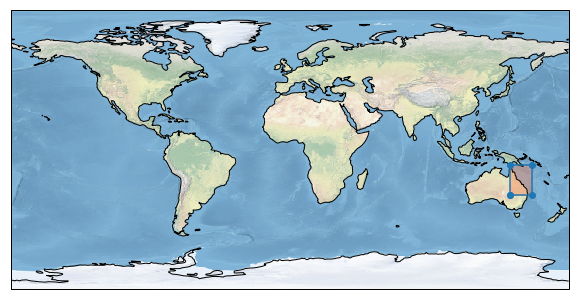

In [316]:

x, y = [142.0,156.0,156.0,142.0,142.0], [-29.0,-29.0,-10.0,-10.0,-29.0]

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.plot(x, y, marker='o', transform=ccrs.PlateCarree())
ax.fill(x, y, transform=ccrs.PlateCarree(), color='coral', alpha=0.4)

plt.show()

## Climate model temperature projections for the Great Barrier Reef

In [317]:
model_surface_temperature_119 = iris.load_cube('data/CNRM-ESM2-1_global_hist_119_GBR_surfacetemperature_year_mean.nc')
model_surface_temperature_585 = iris.load_cube('data/CNRM-ESM2-1_global_hist_585_GBR_surfacetemperature_year_mean.nc')


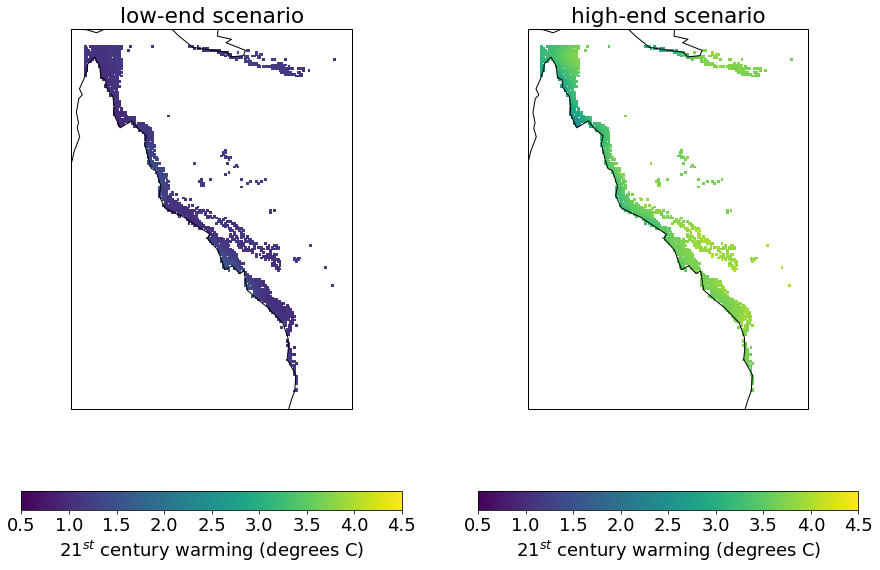

In [318]:
model_surface_temperature_119_first20 = model_surface_temperature_119[0:20].collapsed('time',iris.analysis.MEAN)
model_surface_temperature_119_last20 = model_surface_temperature_119[-20::].collapsed('time',iris.analysis.MEAN)

model_surface_temperature_585_first20 = model_surface_temperature_585[0:20].collapsed('time',iris.analysis.MEAN)
model_surface_temperature_585_last20 = model_surface_temperature_585[-20::].collapsed('time',iris.analysis.MEAN)



fig = plt.figure(figsize=(15, 10))

##### ssp585 ####

ax1 = plt.subplot2grid((1,2), (0, 1))
c = iplt.pcolormesh(model_surface_temperature_585_last20 - model_surface_temperature_585_first20,vmin = 0.5,vmax = 4.5)
plt.gca().coastlines()
plt.title('high-end scenario')
cbar = plt.colorbar(c,orientation="horizontal")
cbar.set_label('21$^{st}$ century warming (degrees C)')

##### ssp119 ####

ax2 = plt.subplot2grid((1,2), (0, 0))
c = iplt.pcolormesh(model_surface_temperature_119_last20 - model_surface_temperature_119_first20,vmin = 0.5,vmax = 4.5)
plt.gca().coastlines()
plt.title('low-end scenario')
cbar = plt.colorbar(c,orientation="horizontal")
cbar.set_label('21$^{st}$ century warming (degrees C)')



Text(0,0.5,'temperature (degrees C)')

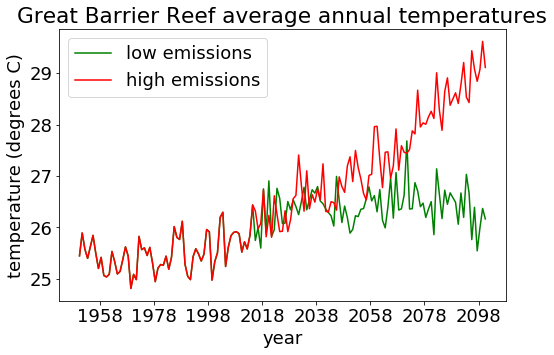

In [319]:
fig = plt.figure(figsize=(8,5))
qplt.plot(area_avg(model_surface_temperature_119[0:-1]),'g',label='low emissions')
qplt.plot(area_avg(model_surface_temperature_585[0:-1]),'r',label='high emissions')
plt.legend()
plt.title('Great Barrier Reef average annual temperatures')
plt.xlabel('year')
plt.ylabel('temperature (degrees C)')

## Degree Heating Weeks - a measure of potential coral heat stress

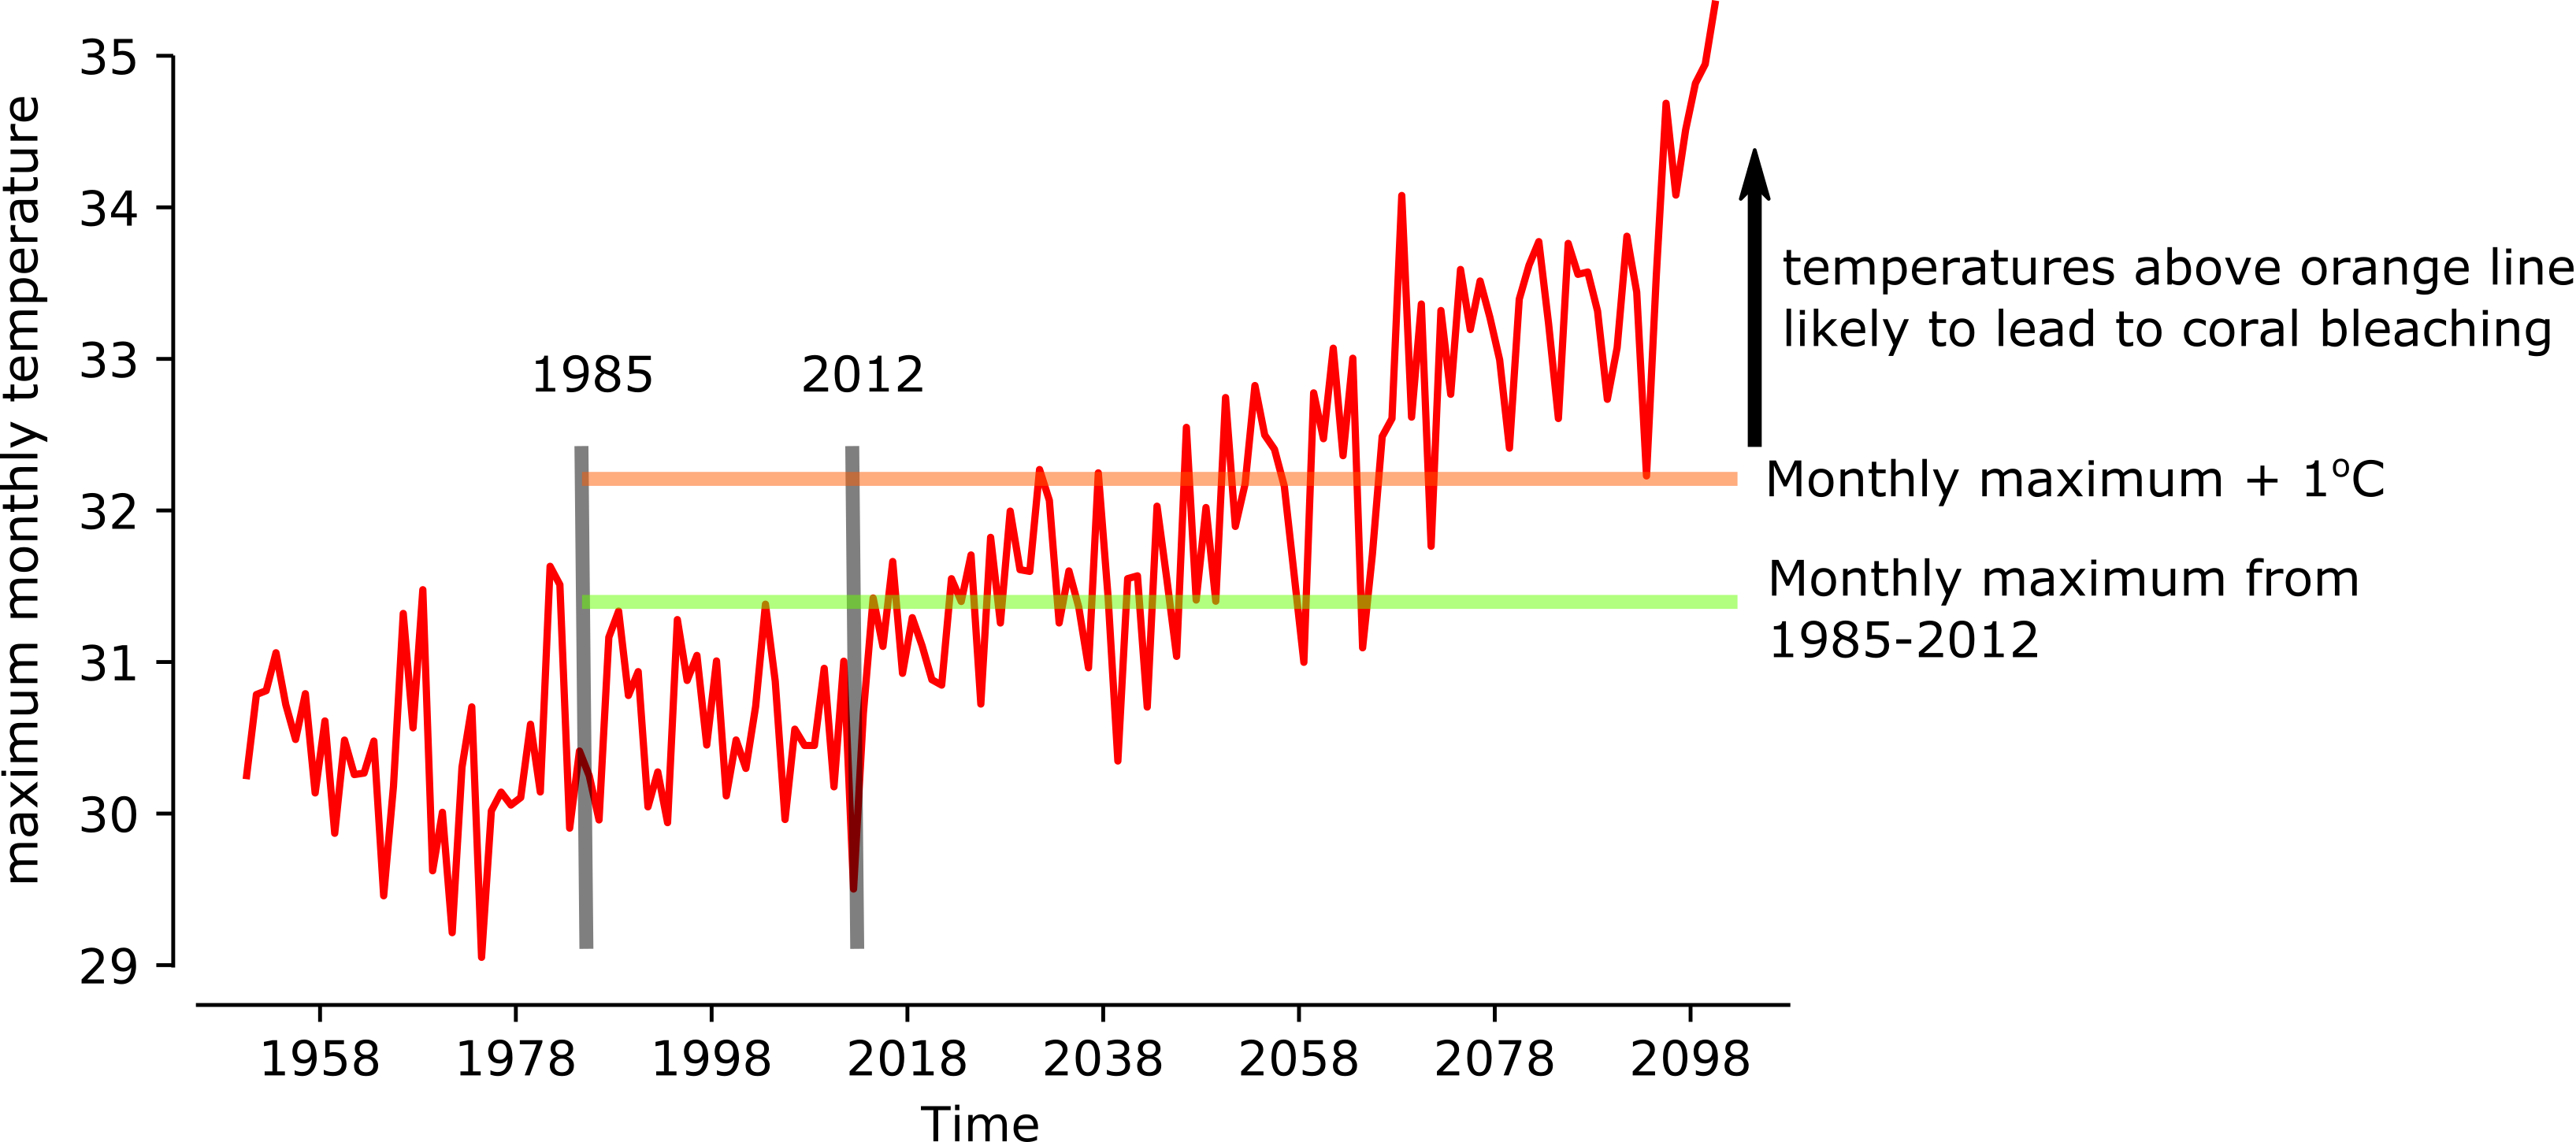

In [320]:
Image(filename='images/mmm.png') 

## Severe coral bleaching
Severe coral bleaching is found when thhe Degree Heating Week matric exceeds 8

In [321]:
asb_cube_119 = iris.load_cube('data/asb_cube_119.nc')
asb_cube_585 = iris.load_cube('data/asb_cube_585.nc')


In [322]:

years,asb_fraction_119 = area_fraction(asb_cube_119,dhw_cube_119[0].data.mask)
years,asb_fraction_585 = area_fraction(asb_cube_585,dhw_cube_119[0].data.mask)


/Users/ph290/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


Text(0,0.5,'fraction of reef\nexperiencing severe bleaching')

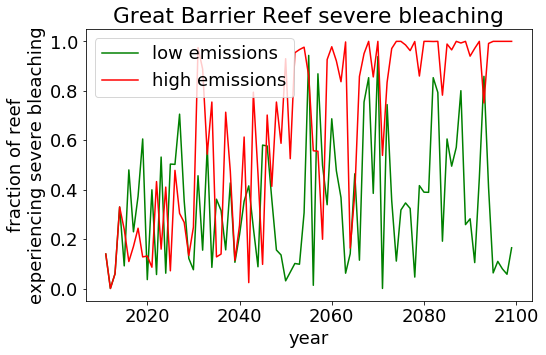

In [326]:
fig = plt.figure(figsize=(8,5))
plt.plot(years,asb_fraction_119,'g',label='low emissions')
plt.plot(years,asb_fraction_585,'r',label='high emissions')
plt.legend()
plt.title('Great Barrier Reef severe bleaching')
plt.xlabel('year')
plt.ylabel('fraction of reef\nexperiencing severe bleaching')

## Your Task

Edit the year values after 'start_yr' and 'end_yr' below and run the cell (shift enter).

The plot which is produced below shows the percent of years in the period you have selected which are projected to experience severe coral bleaching.

By varying these values answer 2 questions:

Does the low-end scenario protect the Great Barrier Reef from widespread coral bleaching?
How long do we have until most of the reef is bleaching most of the time under the high-end scenario?

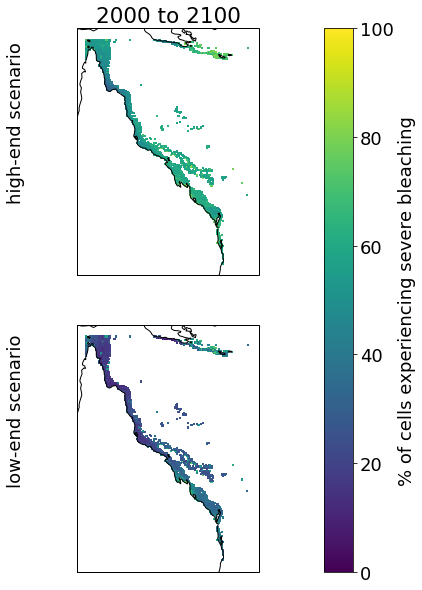

In [335]:
### edit these two lines ###

start_yr = 2000
end_yr = 2100


###### produce the plots ######

fig = plt.figure(figsize=(6, 10))

no_x = 10
no_y = 2


start_yrs = [start_yr1,start_yr2,start_yr3,start_yr4]
end_yrs = [end_yr1,end_yr2,end_yr3,end_yr4]


##### ssp585 ####

ax = plt.subplot2grid((no_y,no_x), (0, 0),colspan=9)
c = iplt.pcolormesh(frequency_of_asb(asb_cube_585,start_yr,end_yr)*100.0,vmin=0.0,vmax=100.0)
plt.gca().coastlines('50m')
plt.title(str(start_yr)+' to '+str(end_yr))


##### ssp119 ####

ax = plt.subplot2grid((no_y,no_x), (1, 0),colspan=9)
iplt.pcolormesh(frequency_of_asb(asb_cube_119,start_yr,end_yr)*100.0,vmin=0.0,vmax=100.0)
plt.gca().coastlines('50m')


        
fig.text(0.1, 0.75, 'high-end scenario', va='center', rotation='vertical')
fig.text(0.1, 0.35, 'low-end scenario', va='center', rotation='vertical')

# ax = plt.subplot2grid((no_y,no_x), (10, 0),colspan=4)
# cbar = plt.colorbar(c,orientation="horizontal", cax=ax)
# cbar.set_label('fraction of cells experiencing severe bleaching in any year')

ax = plt.subplot2grid((no_y,no_x), (0, 9),rowspan=2)
cbar = plt.colorbar(c,orientation="vertical", cax=ax)
cbar.set_label('% of cells experiencing severe bleaching')



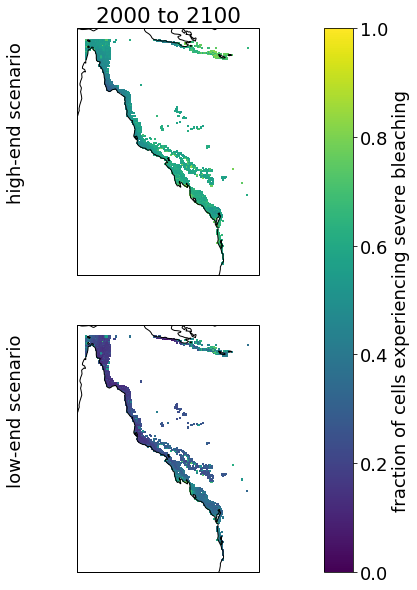